<a href="https://colab.research.google.com/github/Hlamulo1/Research-/blob/main/results_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uboosted Code**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features


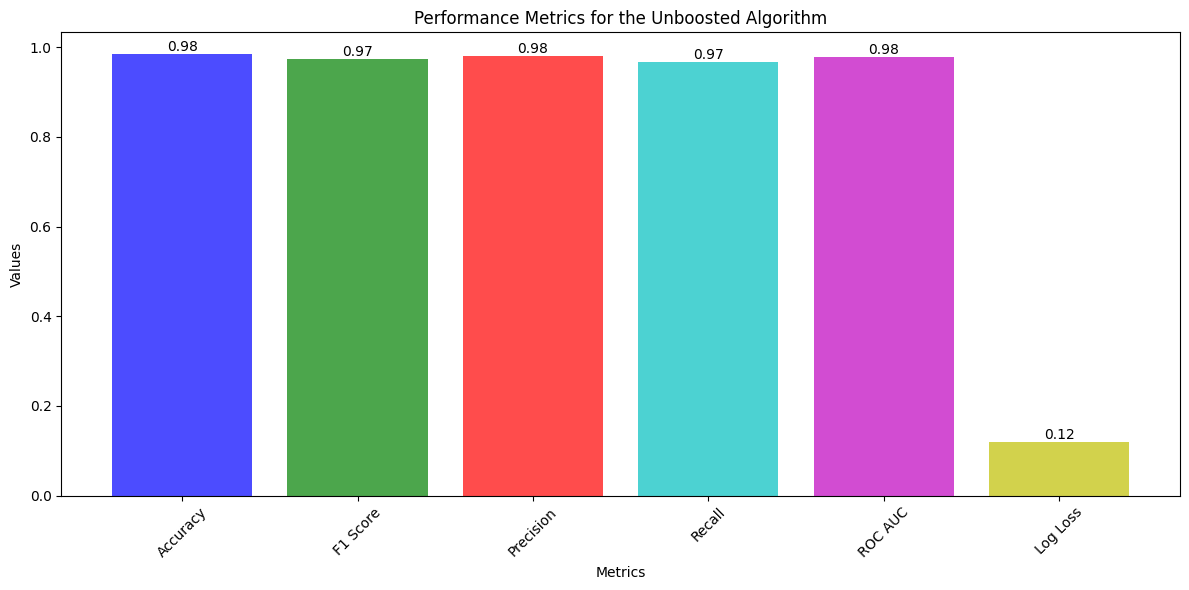

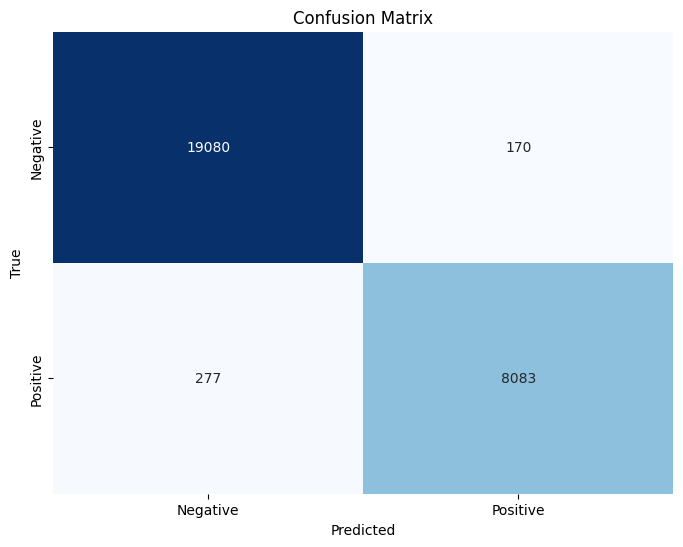

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, log_loss

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
randomModel = clf.fit(X_train, y_train)

# Predictions on the test data
prediction = randomModel.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, randomModel.predict_proba(X_test))

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)

# Create a bar chart with different colors for each metric
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
values = [accuracy, f1, precision, recall, roc_auc, logloss]
colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(12, 6))
plt.bar(metrics, values, color=colors, alpha=0.7)

# Display the actual values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, '{:.2f}'.format(v), ha='center', va='bottom')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for the Unboosted Algorithm')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import log_loss

# Assuming you already have your predictions and true labels
# prediction = randomModel.predict(X_test)
# y_test = ...

# Calculate log loss
logloss = log_loss(y_test, randomModel.predict_proba(X_test))

print("Log Loss:", logloss)


Log Loss: 0.11940397645581528


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, log_loss, accuracy_score, confusion_matrix
import seaborn as sns


# Calculate metrics
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, randomModel.predict_proba(X_test))
confusion_mat = confusion_matrix(y_test, prediction)

# Create a DataFrame to display the metrics
data = {
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss'],
    'Value': [accuracy, f1, precision, recall, roc_auc, logloss]
}

df = pd.DataFrame(data)

# Apply styling to the DataFrame for colors and borders
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow; font-weight: bold' if v else '' for v in is_max]

df_styled = df.style.apply(highlight_max, subset=['Value']).\
    applymap(lambda _: 'border: 2px solid black', subset=pd.IndexSlice[:, :])

# Set font size for the table
df_styled.set_properties(**{'font-size': '16px'})

# Display the styled DataFrame
df_styled.set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '18px')])]).hide_index()
df_styled


<ipython-input-15-3db054c30778>:38: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df_styled.set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('font-size', '18px')])]).hide_index()


Metric,Value
Accuracy,0.983810
F1 Score,0.973093
Precision,0.979401
Recall,0.966866
ROC AUC,0.979017
Log Loss,0.119404


# **Boosting using Adaboost ** 50 estimators

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features


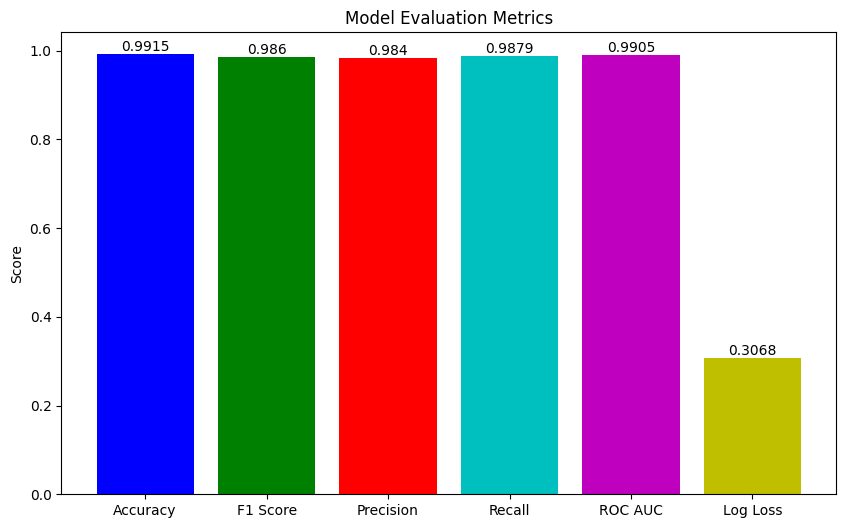

Confusion Matrix:
[[19116   134]
 [  101  8259]]


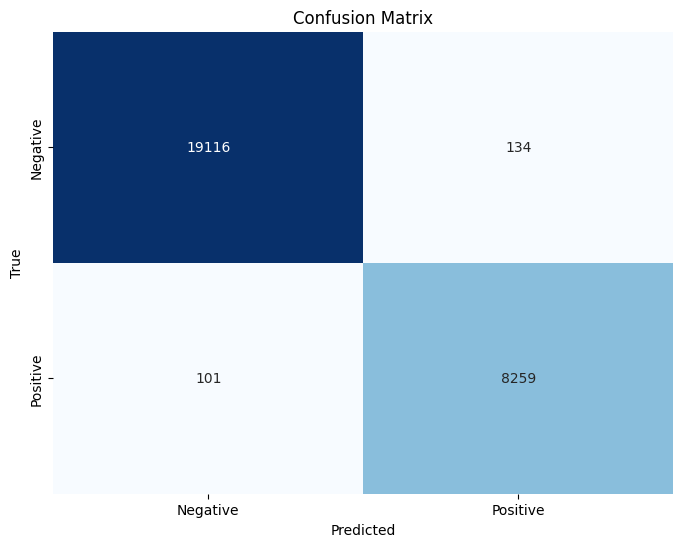

In [17]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import (f1_score, accuracy_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score, log_loss)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Calculate additional metrics
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, prediction)

# Create a bar graph with different colors for the metrics
metrics_names = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
metrics_values = [accuracy, f1, precision, recall, roc_auc, logloss]

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Add actual values on top of each bar
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4),
             ha='center', va='bottom')

plt.show()

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Boosting Using Adaboost 500 estimators**:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features


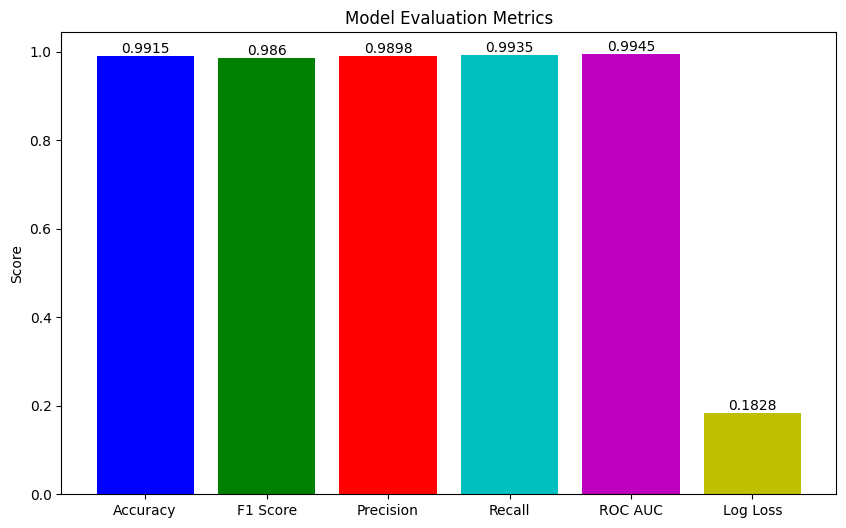

Confusion Matrix:
[[19164    86]
 [   54  8306]]


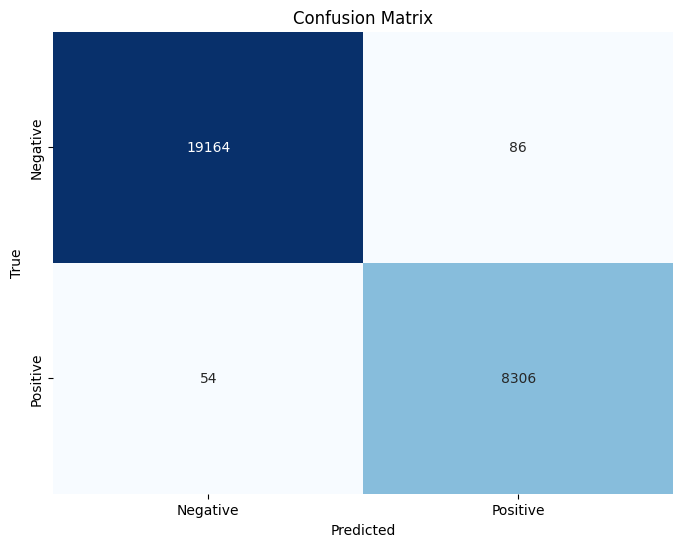

In [19]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import (f1_score, accuracy_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score, log_loss)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=500, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Calculate additional metrics
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, prediction)

# Create a bar graph with different colors for the metrics
metrics_names = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
metrics_values = [accuracy, f1, precision, recall, roc_auc, logloss]

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Add actual values on top of each bar
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4),
             ha='center', va='bottom')

plt.show()

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Boosting with 100 estimators**

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import (f1_score, accuracy_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score, log_loss)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=100, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Calculate additional metrics
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, prediction)

# Create a bar graph with different colors for the metrics
metrics_names = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
metrics_values = [accuracy, f1, precision, recall, roc_auc, logloss]

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Add actual values on top of each bar
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4),
             ha='center', va='bottom')

plt.show()

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **Boosting Using Adaboost 1000 estimators**:

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import (f1_score, accuracy_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score, log_loss)

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change the working directory to the location of your data
%cd '/content/drive/My Drive/MalwareData'

# List files in the directory
!ls

# Load the dataset
file_path = 'MalwareData.csv'
malData = pd.read_csv(file_path, sep='|', low_memory=True)

# Drop unnecessary columns
malData = malData.drop(['Name', 'md5'], axis=1)
print("The Name and md5 variables are removed successfully")

# Split the data into 'legitimate' and 'malicious'
legit = malData.iloc[:41323].drop(["legitimate"], axis=1)
mal = malData.iloc[41323:].drop(["legitimate"], axis=1)

print("The shape of the legit dataset is: %s samples, %s features" % (legit.shape[0], legit.shape[1]))
print("The shape of the mal dataset is: %s samples, %s features" % (mal.shape[0], mal.shape[1]))

# Split the data into training and testing sets
y = malData['legitimate']
X = malData.drop(['legitimate'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostClassifier
base_classifier = RandomForestClassifier(max_depth=2, random_state=0)
ada_boost_model = AdaBoostClassifier(base_classifier, n_estimators=1000, random_state=42)

# Fit the AdaBoost model on the training data
ada_boost_model.fit(X_train, y_train)

# Predictions on the test data
prediction = ada_boost_model.predict(X_test)

# Calculate additional metrics
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
logloss = log_loss(y_test, prediction)

# Create a bar graph with different colors for the metrics
metrics_names = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'ROC AUC', 'Log Loss']
metrics_values = [accuracy, f1, precision, recall, roc_auc, logloss]

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y']
bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')

# Add actual values on top of each bar
for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, round(value, 4),
             ha='center', va='bottom')

plt.show()

# Calculate the confusion matrix for the test dataset
confusion_mat = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_mat)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MalwareData
drebin.csv  kronodroid.csv  malgenome.csv  MalwareData.csv  TUANDROMD.csv
The Name and md5 variables are removed successfully
The shape of the legit dataset is: 41323 samples, 54 features
The shape of the mal dataset is: 96724 samples, 54 features
